In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


In [3]:
# Load datasets (replace with your file paths or loading methods)
orders = pd.read_csv('D_sets/olist_orders_dataset.csv')#
customers= pd.read_csv('D_sets/olist_customers_dataset.csv')#
geolocation = pd.read_csv('D_sets/geographical.csv')
order_items = pd.read_csv('D_sets/olist_order_items_dataset.csv')#
products = pd.read_csv('D_sets/olist_products_dataset.csv')#
sellers = pd.read_csv('D_sets/olist_sellers_dataset.csv')#
payments = pd.read_csv('D_sets/olist_order_payments_dataset.csv')#
reviews = pd.read_csv('D_sets/review_dataset.csv')#
product_translation = pd.read_csv('D_sets/product_category_name_translation.csv')


In [4]:
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,customer_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [14]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
# Perform the LEFT JOINS step by step

merged_df = pd.merge(
    order_items, products,
    on='product_id',
    how='left'
)

In [16]:
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [17]:
merged_df = pd.merge(
    merged_df, product_translation,
    left_on='product_category_name', right_on='product_category_name',
    how='left'
)

In [18]:
merged_df = pd.merge(
    merged_df, orders,
    on='order_id',
    how='left'
)

In [19]:
merged_df = pd.merge(
    merged_df, reviews,
    on='order_id',
    how='left'
)

In [20]:
merged_df = pd.merge(
    merged_df, payments,
    on='order_id',
    how='left'
)
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04


In [21]:
merged_df = pd.merge(
    merged_df, customers, 
    on='customer_id',
    how='left'
)
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [22]:
merged_df = pd.merge(
    merged_df, sellers, 
    on='seller_id',
    how='left'
)
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR


In [23]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [24]:
merged_df.shape

(118310, 40)

In [25]:
merged_df.to_csv("Final_dataset.csv",index=False)

In [26]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [27]:
# Missing values
missing_values = merged_df.isnull().sum()
print(f"Missing Values in Orders: {missing_values}")

# Duplicates
duplicates = merged_df[merged_df.duplicated()]
print(f"Duplicates in merged_df: {duplicates}")

# Check data types
data_types = merged_df.dtypes
print(f"Data Types in merged_df: {data_types}")


Missing Values in Orders: order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1709
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
product_category_name_english      1734
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
review_id                           978
review_score  

In [28]:
def feature_engineering(orders):
    orders["order_date"] = pd.to_datetime(orders["order_purchase_timestamp"])
    orders["delivery_time"] = (pd.to_datetime(orders["order_delivered_customer_date"]) - 
                           pd.to_datetime(orders["order_purchase_timestamp"])).dt.days
    orders["year"] = orders["order_date"].dt.year
    orders["month"] = orders["order_date"].dt.month
    return orders
print (orders)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

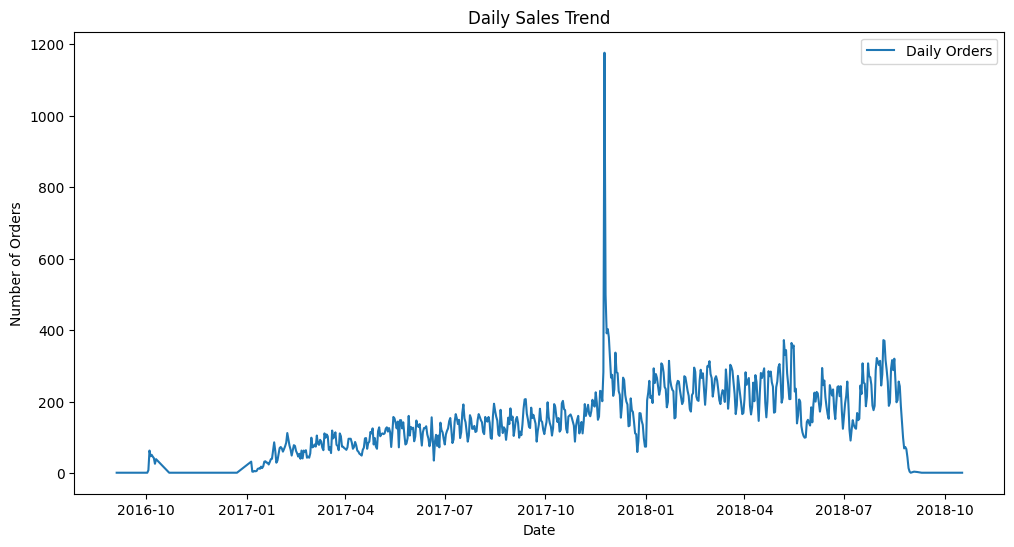

In [29]:
# Convert order purchase timestamp to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract day, week, and month
orders['order_date'] = orders['order_purchase_timestamp'].dt.date
orders['order_week'] = orders['order_purchase_timestamp'].dt.isocalendar().week
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Daily sales
daily_sales = orders.groupby('order_date').size().reset_index(name='daily_orders')

# Weekly sales
weekly_sales = orders.groupby('order_week').size().reset_index(name='weekly_orders')

# Monthly sales
monthly_sales = orders.groupby('order_month').size().reset_index(name='monthly_orders')

# Plotting trends
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['order_date'], daily_sales['daily_orders'], label='Daily Orders')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()


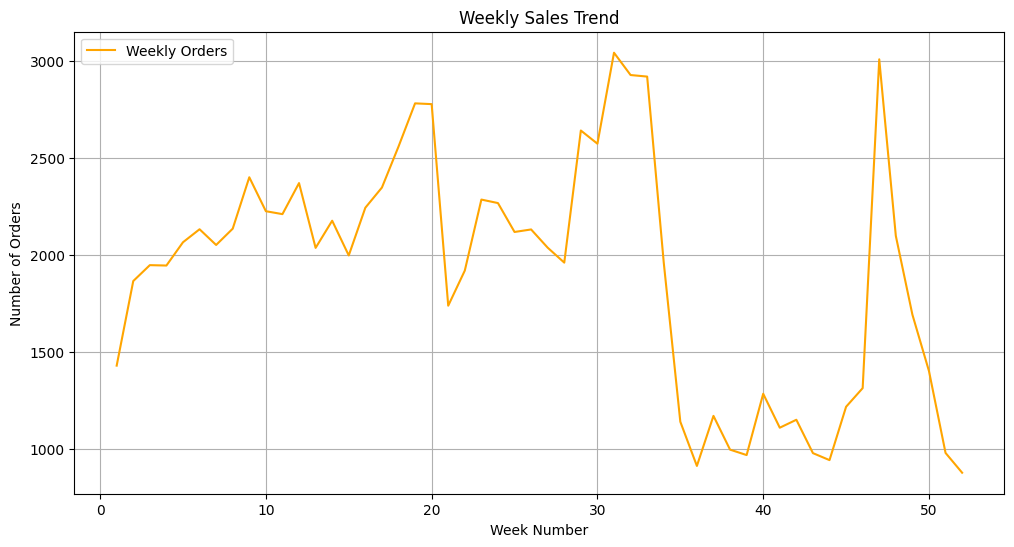

In [30]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_week'] = orders['order_purchase_timestamp'].dt.isocalendar().week
weekly_sales = orders.groupby('order_week').size().reset_index(name='weekly_orders')
# Weekly Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['order_week'], weekly_sales['weekly_orders'], label='Weekly Orders', color='orange')
plt.title('Weekly Sales Trend')
plt.xlabel('Week Number')
plt.ylabel('Number of Orders')
plt.grid()
plt.legend()
plt.show()

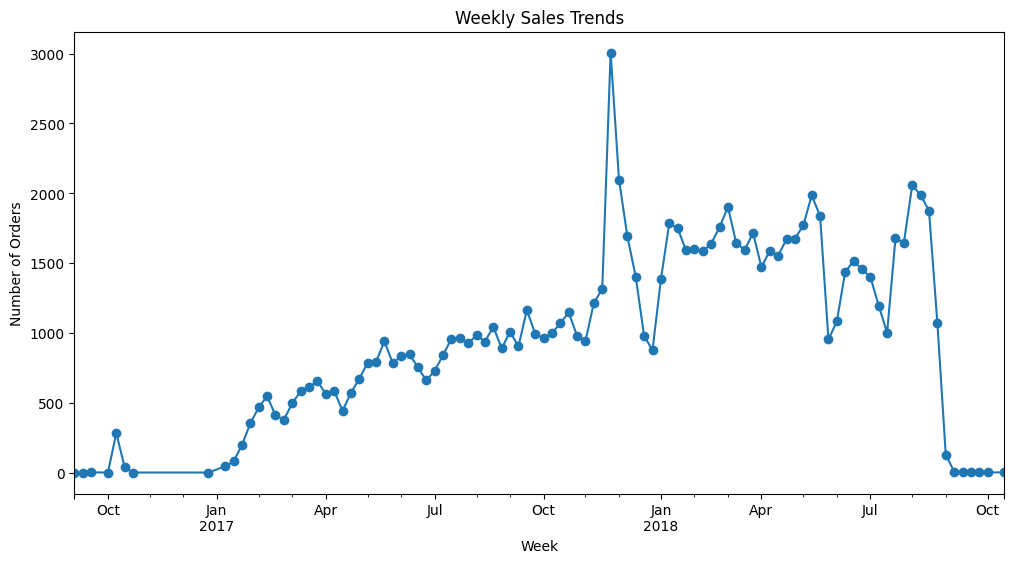

In [31]:

# Analyze weekly sales trends
def analyze_weekly_sales(orders):
    # Ensure 'order_date' is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(orders["order_date"]):
        orders["order_date"] = pd.to_datetime(orders["order_date"])
    
    # Group by week and count orders
    weekly_sales = orders.groupby(orders["order_date"].dt.to_period("W")).size()
    
    # Plot the weekly sales trends
    weekly_sales.plot(kind="line", title="Weekly Sales Trends", figsize=(12, 6), marker='o')
    plt.xlabel("Week")
    plt.ylabel("Number of Orders")
    plt.show()

# Example usage
# Assuming 'orders' is a DataFrame with a valid 'order_date' column
analyze_weekly_sales(orders)


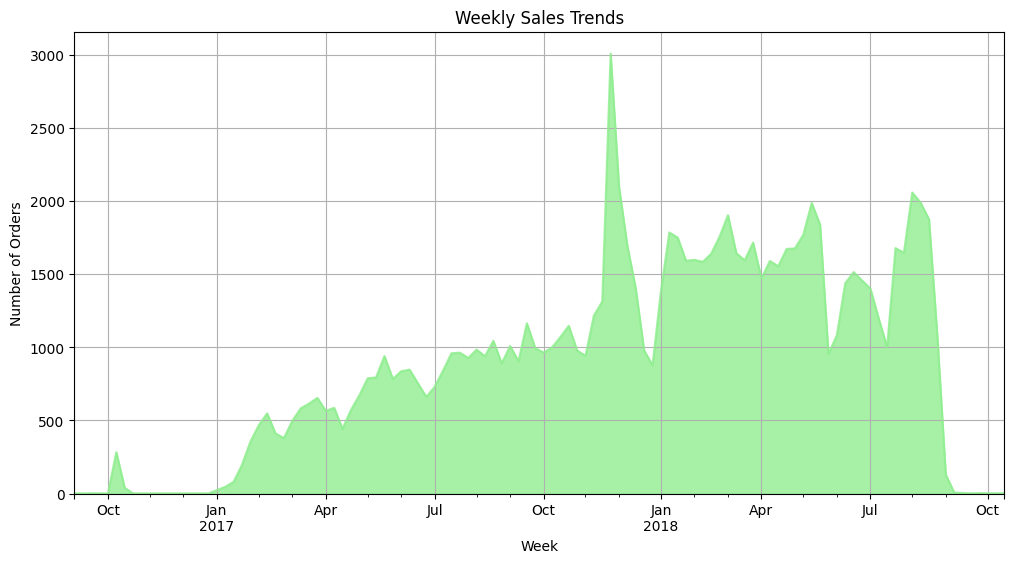

None


In [32]:

# Analyze weekly sales trends with an area chart
def analyze_weekly_sales_area_chart(orders):
    # Ensure 'order_date' is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(orders["order_date"]):
        orders["order_date"] = pd.to_datetime(orders["order_date"])
    
    # Group by week and count orders
    weekly_sales = orders.groupby(orders["order_date"].dt.to_period("W")).size()
    
    # Plot the weekly sales trends as an area chart
    weekly_sales.plot(kind="area", title="Weekly Sales Trends", figsize=(12, 6), color="lightgreen", alpha=0.8)
    plt.xlabel("Week")
    plt.ylabel("Number of Orders")
    plt.grid(True)
    plt.show()

# Example usage
# Assuming 'orders' is a DataFrame with a valid 'order_date' column
print(analyze_weekly_sales_area_chart(orders))


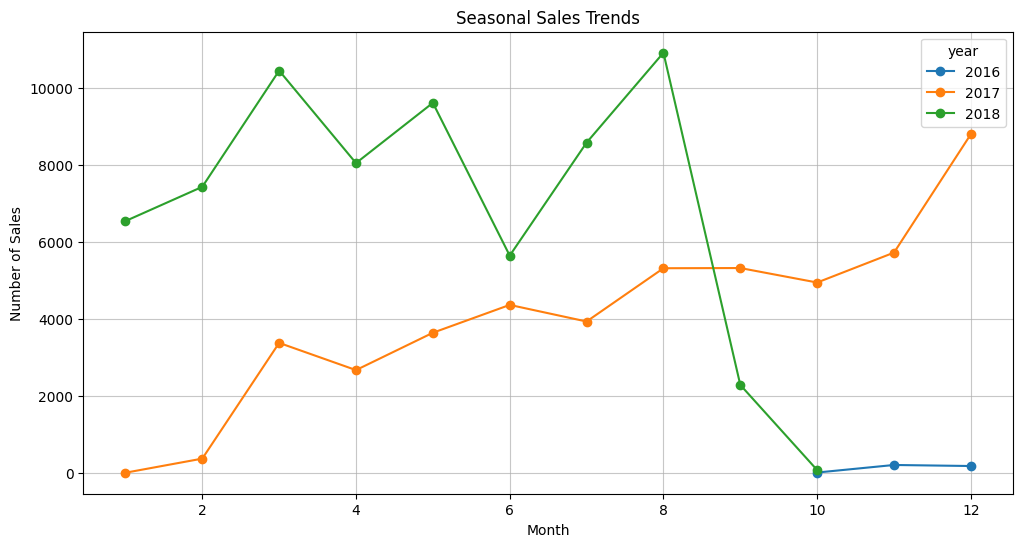

In [33]:


def analyze_seasonal_trends(merged_df):
    merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])
    merged_df['month'] = merged_df['order_estimated_delivery_date'].dt.month
    merged_df['year'] = merged_df['order_estimated_delivery_date'].dt.year

    seasonal_data = merged_df.groupby(['year', 'month']).size().unstack(level=0)
    seasonal_data.plot(figsize=(12, 6), title="Seasonal Sales Trends", marker='o')
    plt.xlabel("Month")
    plt.ylabel("Number of Sales")
    plt.grid(alpha=0.7)
    plt.show()

# Assuming 'merged_df' is your DataFrame, call the function to display the plot:
analyze_seasonal_trends(merged_df)


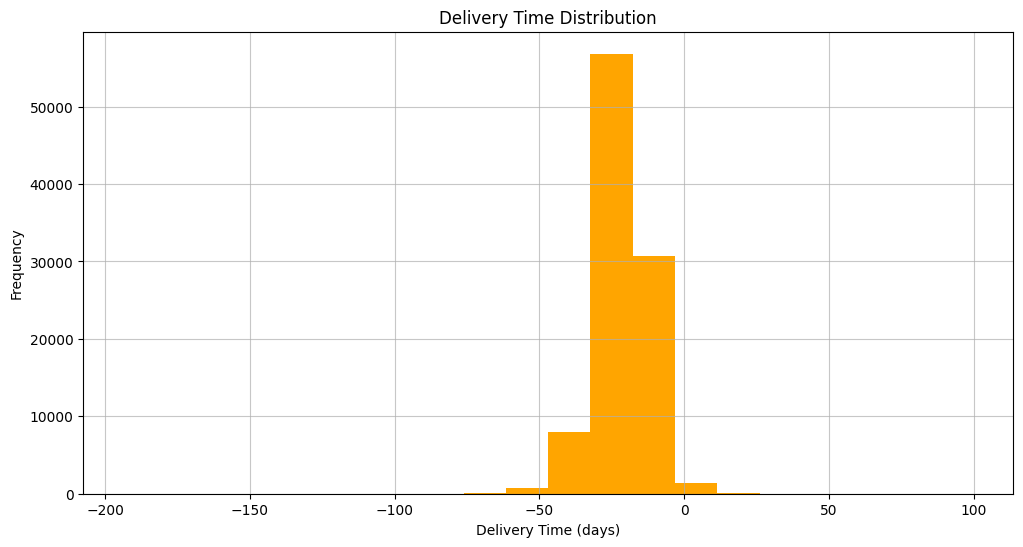

None


In [34]:
 #analyze_delivery_times
def analyze_delivery_times(merged_df):
    merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])
    merged_df['order_delivered_carrier_date'] = pd.to_datetime(merged_df['order_delivered_carrier_date'])
    merged_df['order_purchase_timestamp'] = (merged_df['order_delivered_carrier_date'] - merged_df['order_estimated_delivery_date']).dt.days

    merged_df['order_purchase_timestamp'].plot(kind='hist', bins=20, figsize=(12, 6), color='orange', title="Delivery Time Distribution")
    plt.xlabel("Delivery Time (days)")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.7)
    plt.show()
print(analyze_delivery_times(orders))

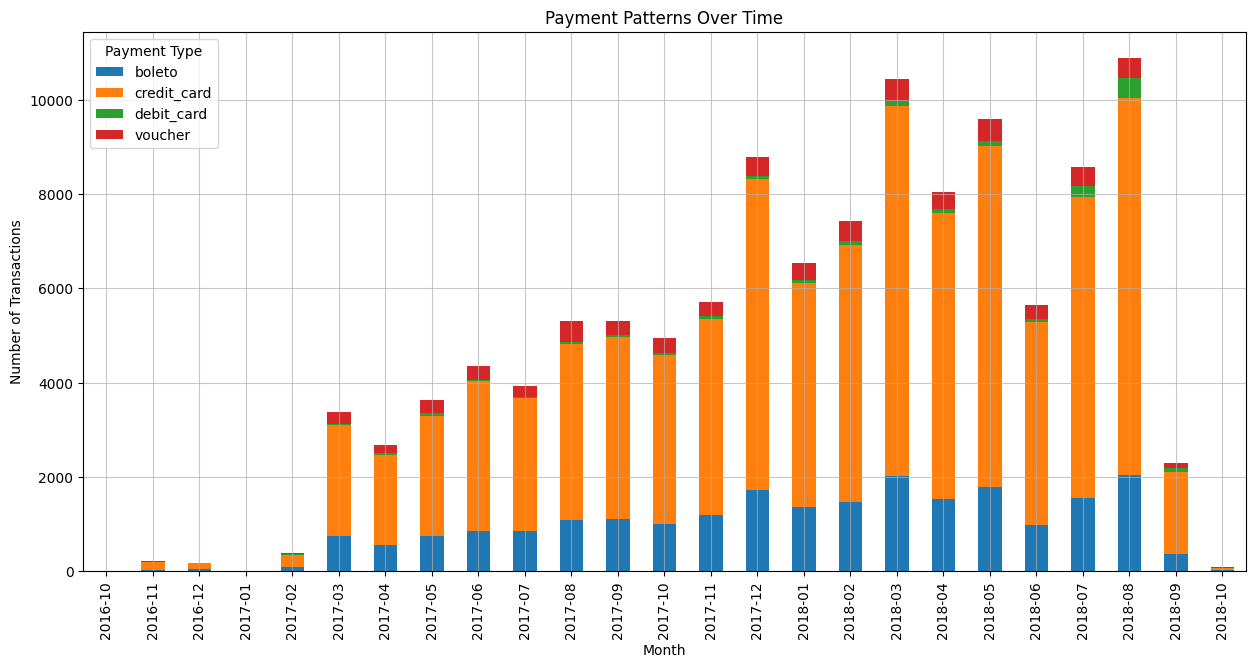

None


In [35]:
def analyze_payment_patterns(merged_df):
    merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])
    payment_patterns = merged_df.groupby([merged_df['order_estimated_delivery_date'].dt.to_period('M'), 'payment_type']).size().unstack()

    payment_patterns.plot(kind='bar', figsize=(15, 7), stacked=True, title="Payment Patterns Over Time")
    plt.xlabel("Month")
    plt.ylabel("Number of Transactions")
    plt.legend(title="Payment Type")
    plt.grid(alpha=0.7)
    plt.show()
print(analyze_payment_patterns(merged_df))

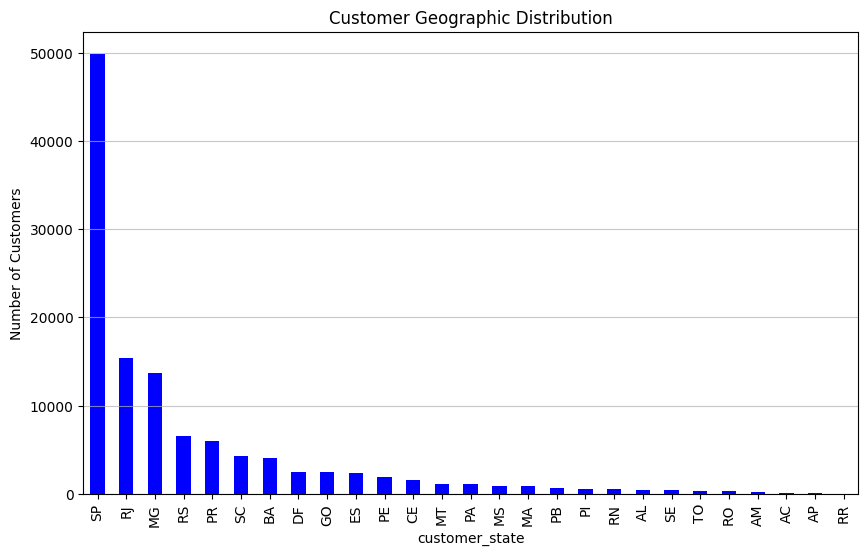

In [36]:
def analyze_customer_geographic_distribution(merged_df):
    location_counts = merged_df["customer_state"].value_counts()
    location_counts.plot(kind="bar", figsize=(10, 6), color="blue", title="Customer Geographic Distribution")
    plt.xlabel("customer_state")
    plt.ylabel("Number of Customers")
    plt.grid(axis="y", linestyle="-", alpha=0.7)
    plt.show()

# Example usage
# Assuming 'customers' is a DataFrame with a 'customer_State' column
analyze_customer_geographic_distribution(merged_df)


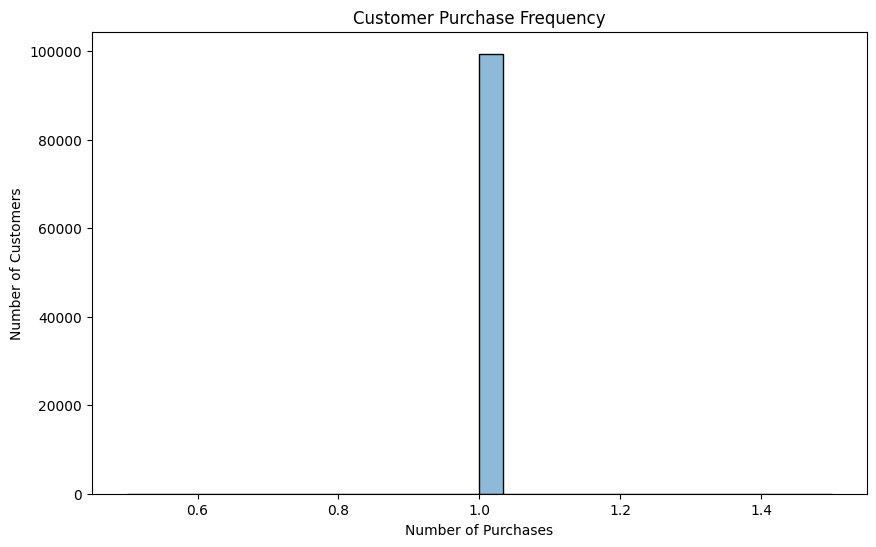

In [85]:
# Frequency of purchases per customer
purchase_frequency = orders.groupby('customer_id').size().reset_index(name='purchase_count')

# Plot histogram of purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency['purchase_count'], bins=30, kde=True)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:

def analyze_spending_habits(merged_df):
    # Ensure the 'payment_value' column exists and that 'customer_id' is available
    if 'payment_value' not in merged_df.columns:
        raise ValueError("The 'payment_value' column is missing in the DataFrame.")

    # Group by 'customer_id' and calculate total spending per customer
    spending_data = merged_df.groupby("customer_id")["payment_value"].sum()

    # Plot the total spending data using a box plot
    spending_data.plot(kind="bar", figsize=(12, 6), title="Customer Spending Habits")
    plt.ylabel("Total Spending")

    plt.show()



# Calling the function
analyze_spending_habits(merged_df)

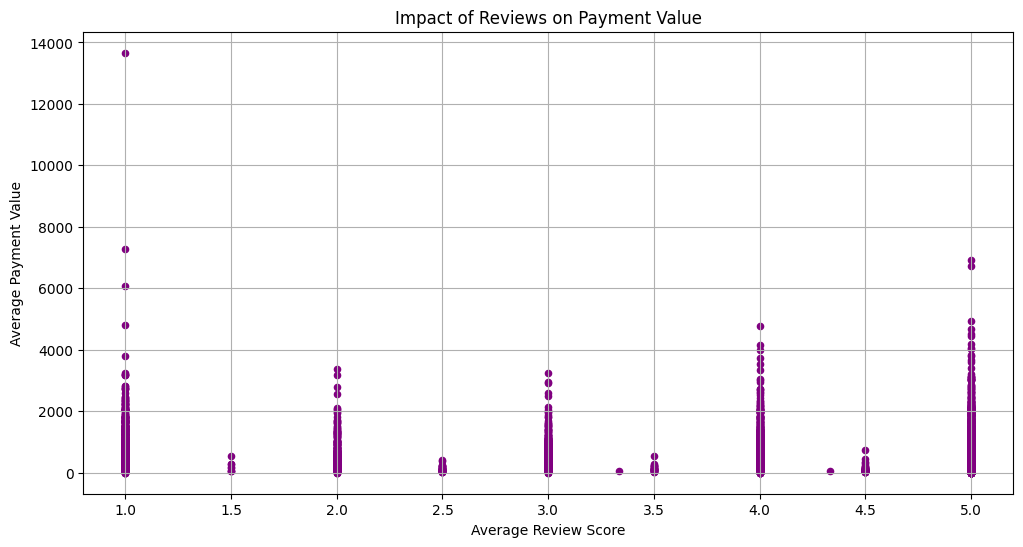

In [54]:


def analyze_reviews_impact(payments, reviews):
    # Merge the payments and reviews data on 'product_id'
    merged_data = pd.merge(payments, reviews, on="order_id", how="left")
    
    # Group by product_id and calculate average review score
    avg_review_score = merged_data.groupby('order_id')['review_score'].mean()
    
    # Calculate average payment value per product_id
    avg_payment_value = merged_data.groupby('order_id')['payment_value'].mean()

    # Concatenate the two Series: average review score and average payment value
    review_sales_corr = pd.concat([avg_payment_value, avg_review_score], axis=1)
    review_sales_corr.columns = ['payment_value', 'review_score']

    # Scatter plot to visualize the impact of reviews on payment value
    review_sales_corr.plot(kind='scatter', x='review_score', y='payment_value', figsize=(12, 6), color='purple', title="Impact of Reviews on Payment Value")
    plt.xlabel("Average Review Score")
    plt.ylabel("Average Payment Value")
    plt.grid(True)
    plt.show()



analyze_reviews_impact(payments, reviews)


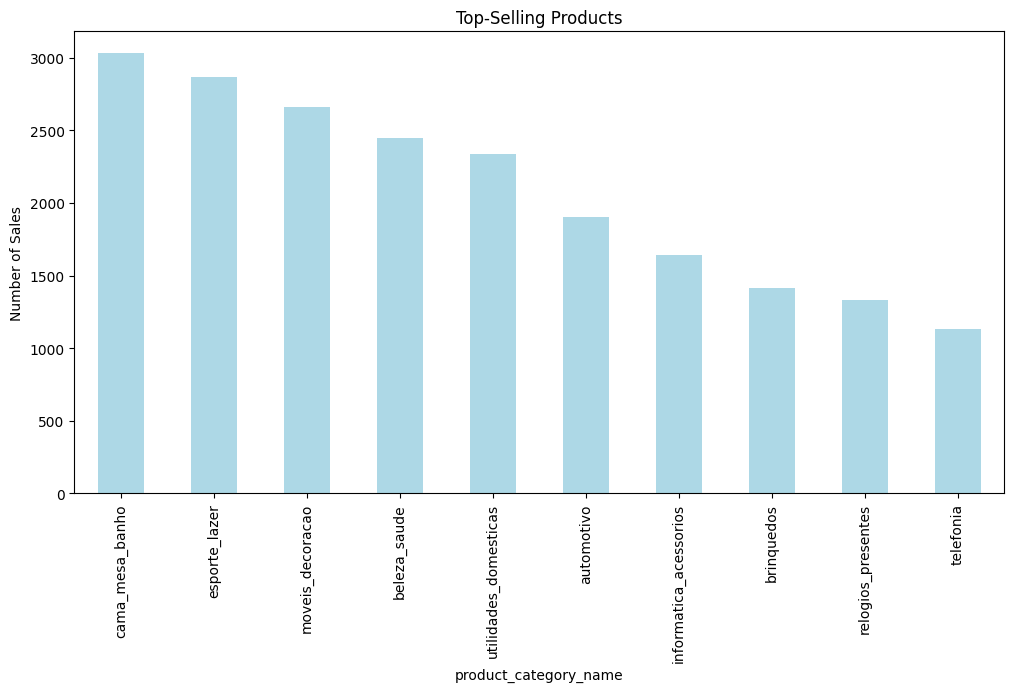

In [55]:
def analyze_top_selling(products):
    top_products = products['product_category_name'].value_counts().head(10)
    top_products.plot(kind='bar', figsize=(12, 6), color='lightblue', title="Top-Selling Products")
    plt.xlabel("product_category_name")
    plt.ylabel("Number of Sales")
    plt.show()

# Example usage
# Assuming 'orders' is a DataFrame with a 'product_id' column
analyze_top_selling(products)

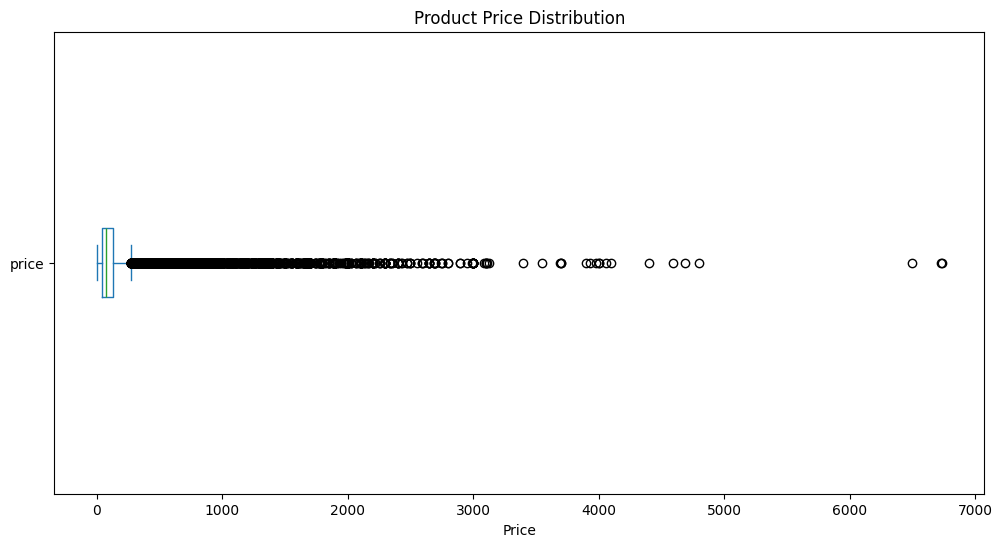

In [56]:
def analyze_price_distribution(order_items):
    order_items['price'].plot(kind='box', vert=False, figsize=(12, 6), title="Product Price Distribution")
    plt.xlabel("Price")
    plt.show()

analyze_price_distribution(order_items)

In [57]:
# Merge data for product analysis
merged_data = order_items.merge(products, on='product_id', how='left')
merged_data = merged_data.merge(product_translation, on='product_category_name', how='left')

# Top-selling products
top_products = merged_data.groupby('product_id')['order_item_id'].count().sort_values(ascending=False).head(10)

# Top-selling categories
top_categories = merged_data.groupby('product_category_name_english')['order_item_id'].count().sort_values(ascending=False).head(10)

print("Top 10 Products:")
print(top_products)
print("\nTop 10 Categories:")
print(top_categories)


Top 10 Products:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: order_item_id, dtype: int64

Top 10 Categories:
product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: order_item_id, dtype: int64


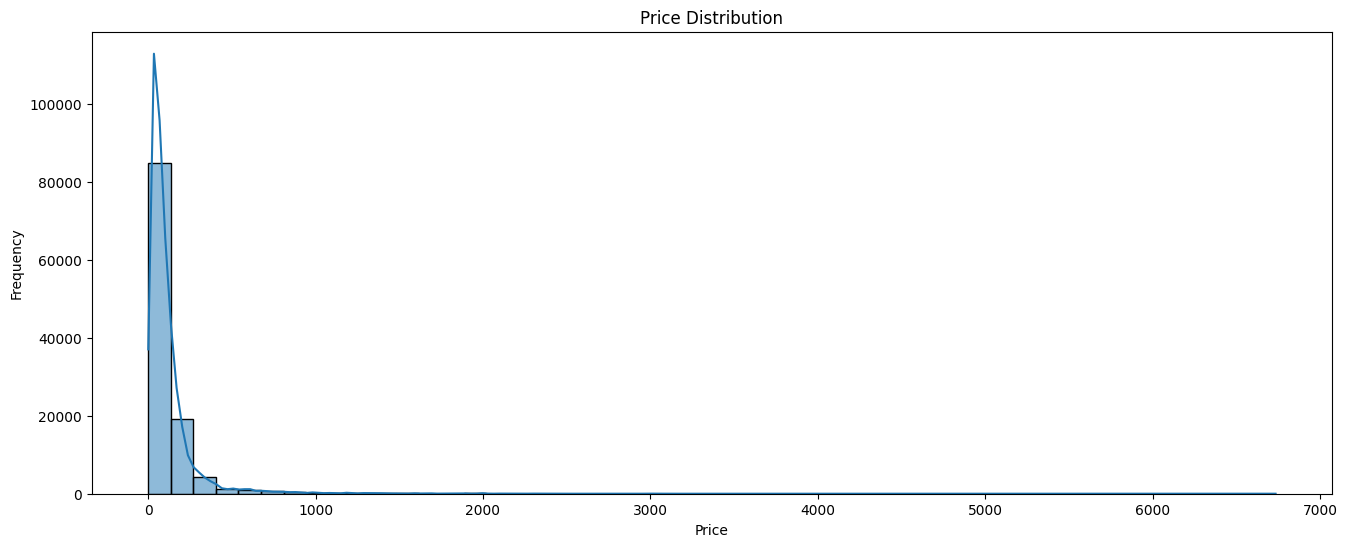

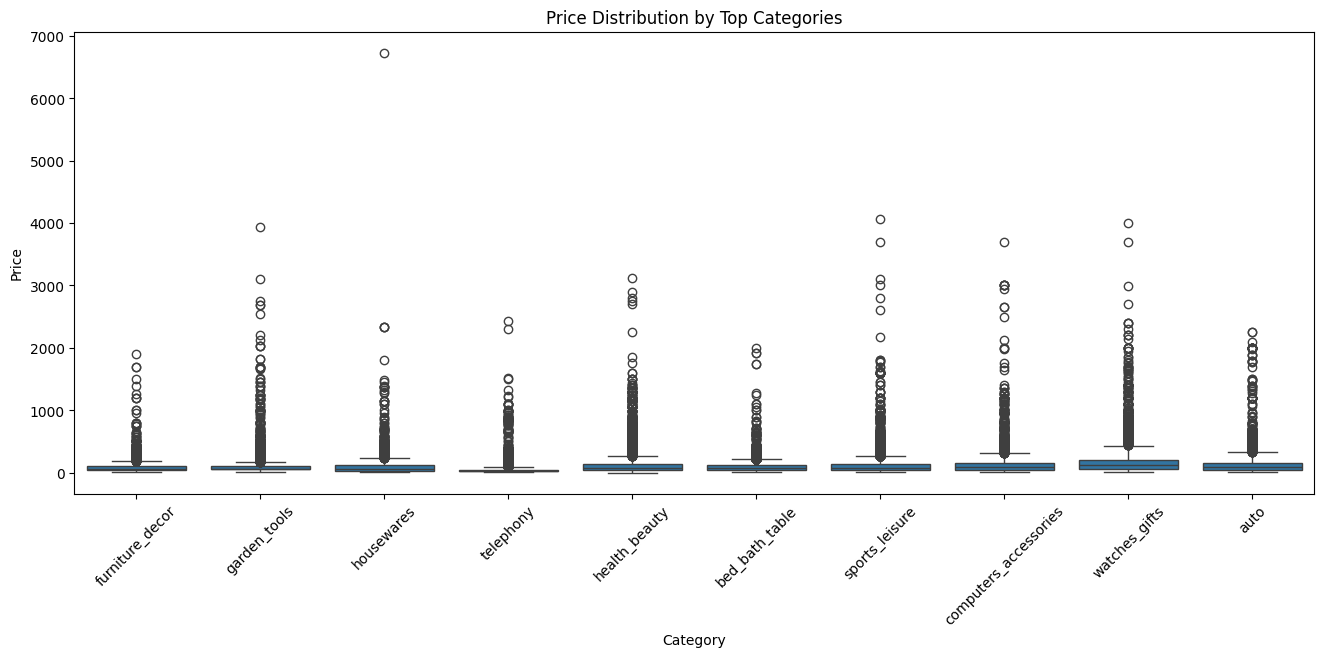

In [58]:
# Price distribution
plt.figure(figsize=(16, 6))
sns.histplot(merged_data['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Price distribution by category
plt.figure(figsize=(16, 6))
top_category_names = top_categories.index.tolist()
sns.boxplot(data=merged_data[merged_data['product_category_name_english'].isin(top_category_names)],
            x='product_category_name_english', y='price')
plt.title('Price Distribution by Top Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


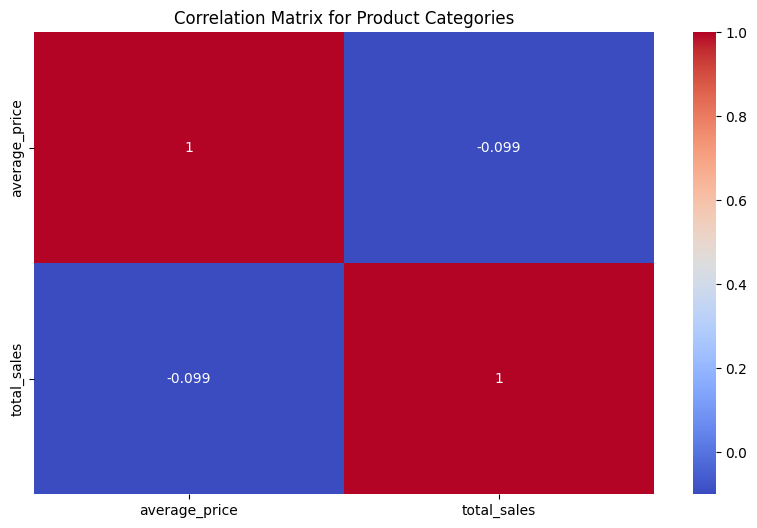

In [59]:
# Correlation between product categories and sales
category_sales = merged_data.groupby(['product_category_name_english']).agg({'price': 'mean', 'order_item_id': 'count'})
category_sales.columns = ['average_price', 'total_sales']

# Heatmap for sales and average price
plt.figure(figsize=(10, 6))
sns.heatmap(category_sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Product Categories')
plt.show()


In [60]:
# Merge reviews to order_items to calculate return rates
review_data = reviews.merge(order_items, on='order_id', how='right')

# Assuming return rate is linked with bad reviews (score ≤ 2)
return_rate = review_data.groupby('product_id').apply(lambda x: (x['review_score'] <= 2).mean())

# Top products with the highest return rates
top_return_products = return_rate.sort_values(ascending=False).head(10)
print("Top 10 Products with Highest Return Rates:")
print(top_return_products)


Top 10 Products with Highest Return Rates:
product_id
0009406fd7479715e4bef61dd91f2462    1.0
fff28f91211774864a1000f918ed00cc    1.0
ffbfa9e143fda4420454d0f4e88a3cd5    1.0
0043c62d00db47eff6a6bc4cf6bfaeda    1.0
002d4ea7c04739c130bb74d7e7cd1694    1.0
ffbc83054b3741a8d67fc59d9cf9d42d    1.0
0011c512eb256aa0dbbb544d8dffcf6e    1.0
ffb2e8c1ddc7c3e590d2bc4c91de53e1    1.0
fff1059cd247279f3726b7696c66e44e    1.0
30a6a74ad9391b95bfc088f875ce8cfc    1.0
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_14888\454885328.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return_rate = review_data.groupby('product_id').apply(lambda x: (x['review_score'] <= 2).mean())


In [85]:

# Feature selection
order_items = order_items[['order_id', 'product_id', 'seller_id', 'price']]

# Drop rows with missing values (optional)
order_items = order_items.dropna()

# Inspect the data
order_items.head()


,order_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90


In [ ]:
# Encoding categorical variables (product_id, seller_id)
order_items = pd.get_dummies(order_items, columns=['product_id', 'seller_id'], drop_first=True)

# Split the data into features (X) and target (y)
X = order_items.drop('price', axis=1)  # Features
y = order_items['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
